In [96]:
#Importing the Libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [97]:
#importing the dataset
dataset=pd.read_csv(r"C:\Users\jyots\Onedrive\Desktop\50_startups.csv")


In [98]:
len(dataset)

50

In [99]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [100]:
dataset.shape

(50, 5)

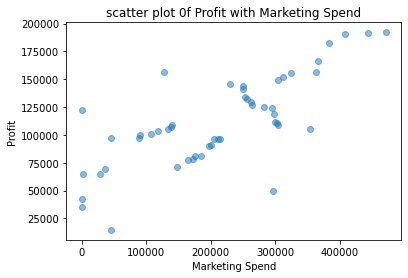

In [101]:
import matplotlib.pyplot as plt
plt.scatter(dataset['Marketing Spend'],dataset['Profit'],alpha=0.5)
plt.title('scatter plot 0f Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

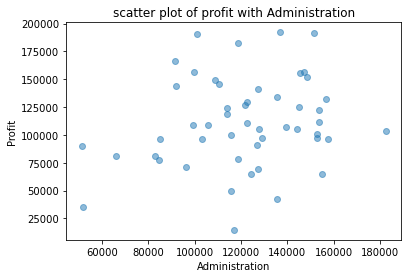

In [102]:
plt.scatter(dataset['Administration'],dataset['Profit'],alpha=0.5)
plt.title('scatter plot of profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

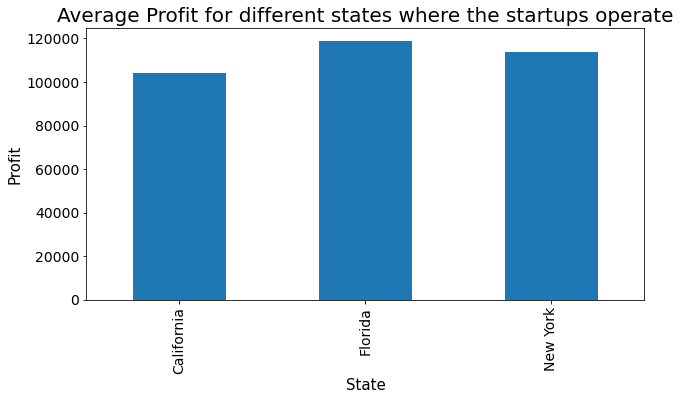

In [103]:
#Create the figure object
ax=dataset.groupby(['State'])['Profit'].mean().plot.bar(
     figsize=(10,5),
    fontsize=14
)
                              
#Set the title                              
ax.set_title("Average Profit for different states where the startups operate",fontsize=20)

#Set x and y labels                              
ax.set_xlabel("State",fontsize=15)
ax.set_ylabel("Profit",fontsize=15)        

In [104]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [105]:
import numpy as np
dataset['New York_State']=np.where(dataset['State']=='New York', 1,0)
dataset['California_State']=np.where(dataset['State']=='California', 1,0)
dataset['Florida_State']=np.where(dataset['State']=='Florida', 1,0)

dataset.drop(columns=['State'],axis=1,inplace=True)

In [106]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [107]:
dependent_variable='Profit'

In [108]:
#create a list of independent variables
independent_variables=dataset.columns.tolist()

In [109]:
independent_variables.remove(dependent_variable)

In [110]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'New York_State',
 'California_State',
 'Florida_State']

In [111]:
#Create the data of independent variables
x=dataset[independent_variables].values

#Create the dependent variable data
y=dataset[dependent_variable].values

In [112]:
#Splitting the dataset into the Training set and Test set
x_train, x_test ,y_train ,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [113]:
#Transforming the data
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [114]:
x_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 1.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 1.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 0.        ,
        1.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 1.        , 0.        ,
        0.        ]])

In [115]:
#Fitting Multiple Linear Regression to the Training set
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [116]:
#predicting the Test set results
y_pred=regressor.predict(x_test)


In [117]:
math.sqrt(mean_squared_error(y_test,y_pred))

9137.990152794935

In [119]:
r2_score(y_test,y_pred)

0.9347068473282426